# Shelf transport to offshore. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmocean as cm
import matplotlib.colors as colors

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/data1/bbeutel/LO_user/trace_metals/daily_transport.csv")
df.head()

,Unnamed: 0,dates,south,north,loop,offshore
0,0,2017-01-01,31523.150134,446173.178852,1.564897e+06,134578.264178
1,1,2017-01-02,30711.416257,496092.148095,1.342925e+06,119652.985191
2,2,2017-01-03,28947.529846,657004.390949,1.105739e+06,141002.901359
3,3,2017-01-04,28814.534290,798356.947900,1.074042e+06,130871.950872
4,4,2017-01-05,41037.808316,754971.199198,1.020577e+06,144477.688500


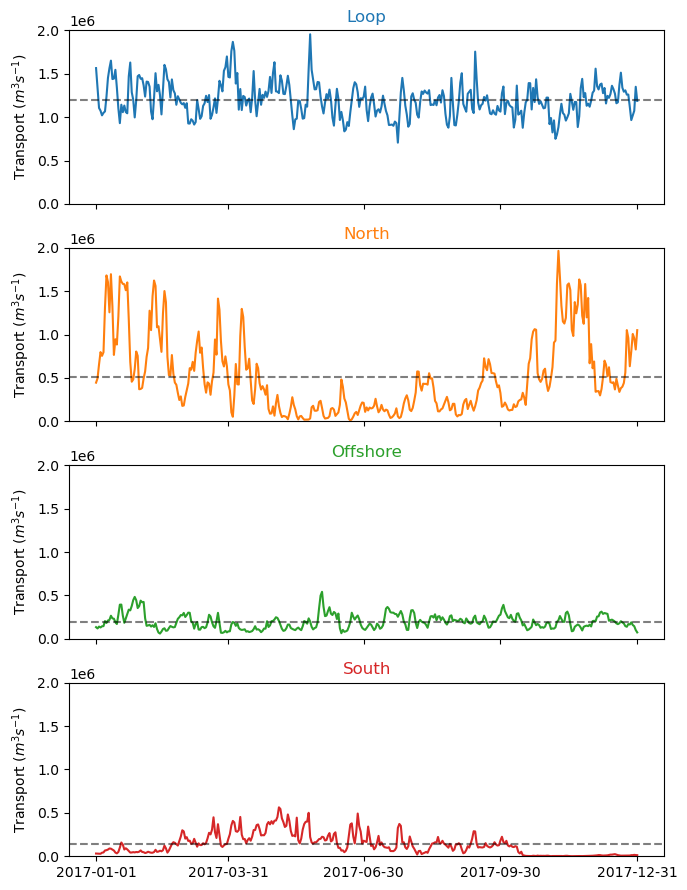

In [3]:
fig, ax = plt.subplots(4,1,figsize=[7,9])

ax[0].plot(df.dates,df.loop,c='tab:blue')
ax[0].axhline(np.mean(df.loop),c='k',ls='dashed',alpha=0.5)
ax[0].set_title('Loop',c='tab:blue')

ax[1].plot(df.dates,df.north,c='tab:orange')
ax[1].axhline(np.mean(df.north),c='k',ls='dashed',alpha=0.5)
ax[1].set_title('North',c='tab:orange')

ax[2].plot(df.dates,df.offshore,c='tab:green')
ax[2].axhline(np.mean(df.offshore),c='k',ls='dashed',alpha=0.5)
ax[2].set_title('Offshore',c='tab:green')

ax[3].plot(df.dates,df.south,c='tab:red')
ax[3].axhline(np.mean(df.south),c='k',ls='dashed',alpha=0.5)
ax[3].set_title('South',c='tab:red')


for axs in ax:
    axs.set_ylim([0,2000000])
    axs.set_xticks([df.dates[0],df.dates[89],df.dates[180],df.dates[272],df.dates[364]])
    axs.set_xticklabels([])
    axs.set_ylabel('Transport ($m^3 s^{-1}$)')
ax[3].set_xticklabels([str(df.dates[0])[:10],str(df.dates[89])[:10],str(df.dates[180])[:10],str(df.dates[272])[:10],str(df.dates[364])[:10]])

plt.tight_layout()

In [4]:
print(f"south mean = {np.round(np.mean(df.south),0)/1000} mSv")
print(f"north mean = {np.round(np.mean(df.north),0)/1000} mSv")
print(f"offshore mean = {np.round(np.mean(df.offshore),0)/1000} mSv")
print(f"loop mean = {np.round(np.mean(df.loop),0)/1000} mSv")

south mean = 136.832 mSv
north mean = 512.387 mSv
offshore mean = 196.606 mSv
loop mean = 1200.087 mSv


# parcel analysis

In [5]:
south = pd.read_csv("/data1/bbeutel/LO_user/trace_metals/south.csv")
north = pd.read_csv("/data1/bbeutel/LO_user/trace_metals/north.csv")
loop = pd.read_csv("/data1/bbeutel/LO_user/trace_metals/loop.csv")
off = pd.read_csv("/data1/bbeutel/LO_user/trace_metals/offshore.csv")
off.head()

,Unnamed: 0,transport,init_lon,init_lat,init_depth,init_time,init_temp,init_salt,final_lon,final_lat,final_depth,final_time,final_temp,final_salt
0,0,108.637982,-124.751247,47.203372,-0.629020,1.0,10.117016,32.038310,-129.214504,47.279738,26.775214,922.993103,8.928267,32.728703
1,1,111.794730,-124.741539,47.203372,-0.630048,1.0,10.050319,32.000298,-129.214504,49.724739,26.990478,1124.510027,8.288424,32.691520
2,2,215.317179,-124.703089,47.203372,0.505800,1.0,9.641207,31.695019,-129.214504,48.587931,53.269202,2871.567575,8.565330,32.794630
3,3,197.316641,-124.810312,47.428367,-0.535717,1.0,9.731203,31.317860,-129.214504,49.993850,40.736957,811.771115,8.552938,32.593952
4,4,443.646614,-124.780604,47.428367,2.942992,1.0,9.865535,31.622230,-129.214504,49.472362,45.704428,912.576561,8.887286,32.483555


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

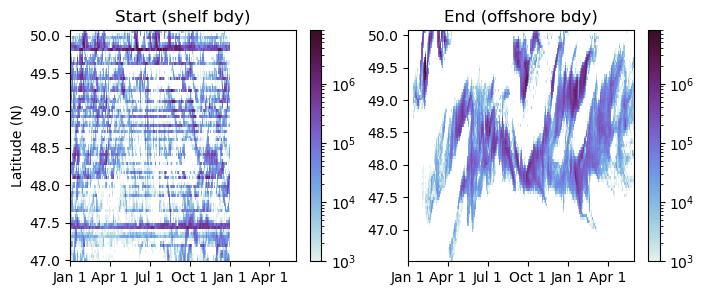

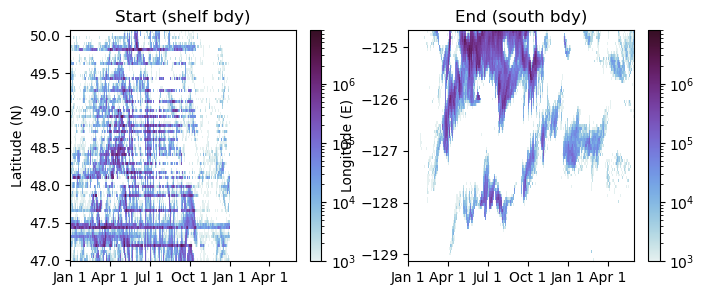

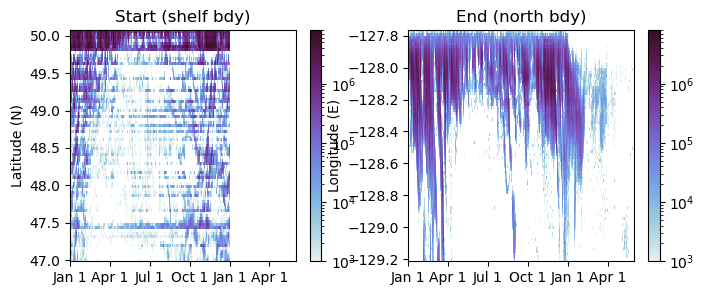

In [6]:
# the shelf and the offshore line are (generally) north/south, lets see the lats that parcels that reach the offshore section generally start at

############
# OFFSHORE #
############
fig, ax = plt.subplots(1,2,figsize=[8,3])

# labelling
ax[0].set_ylabel('Latitude (N)')
ax[0].set_title('Start (shelf bdy)')
ax[1].set_title('End (offshore bdy)')
for axs in ax:
    axs.set_xlim([0,12360])
    axs.set_xticks([0,2161,4345,6553,8761,10921,])
    axs.set_xticklabels(['Jan 1','Apr 1','Jul 1','Oct 1','Jan 1','Apr 1'],fontsize=10)

#histogram
bins = [np.arange(0,np.max(off.init_time),24),np.linspace(np.min(off.init_lat),np.max(off.init_lat),80)]
H, xedges, yedges=np.histogram2d(off.init_time,off.init_lat,weights=off.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=8000000))
cb = fig.colorbar(im, ax=ax[0])

#histogram
bins = [np.arange(np.min(off.final_time),np.max(off.final_time),24),np.linspace(np.min(off.final_lat),np.max(off.final_lat),80)]
H, xedges, yedges=np.histogram2d(off.final_time,off.final_lat,weights=off.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=8000000))
cb = fig.colorbar(im, ax=ax[1])
plt.tight_layout


#########
# SOUTH #
#########
fig, ax = plt.subplots(1,2,figsize=[8,3])

# labelling
ax[1].set_ylabel('Longitude (E)')
ax[0].set_ylabel('Latitude (N)')
ax[0].set_title('Start (shelf bdy)')
ax[1].set_title('End (south bdy)')
for axs in ax:
    axs.set_xlim([0,12360])
    axs.set_xticks([0,2161,4345,6553,8761,10921,])
    axs.set_xticklabels(['Jan 1','Apr 1','Jul 1','Oct 1','Jan 1','Apr 1'],fontsize=10)

#histogram
bins = [np.arange(0,np.max(south.init_time),24),np.linspace(np.min(south.init_lat),np.max(south.init_lat),80)]
H, xedges, yedges=np.histogram2d(south.init_time,south.init_lat,weights=south.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=8000000))
cb = fig.colorbar(im, ax=ax[0])

#histogram
bins = [np.arange(np.min(south.final_time),np.max(south.final_time),24),np.linspace(np.min(south.final_lon),np.max(south.final_lon),80)]
H, xedges, yedges=np.histogram2d(south.final_time,south.final_lon,weights=south.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=8000000))
cb = fig.colorbar(im, ax=ax[1])
plt.tight_layout


#########
# NORTH #
#########
fig, ax = plt.subplots(1,2,figsize=[8,3])

# labelling
ax[0].set_ylabel('Latitude (N)')
ax[1].set_ylabel('Longitude (E)')
ax[0].set_title('Start (shelf bdy)')
ax[1].set_title('End (north bdy)')
for axs in ax:
    axs.set_xlim([0,12360])
    axs.set_xticks([0,2161,4345,6553,8761,10921,])
    axs.set_xticklabels(['Jan 1','Apr 1','Jul 1','Oct 1','Jan 1','Apr 1'],fontsize=10)

#histogram
bins = [np.arange(0,np.max(north.init_time),24),np.linspace(np.min(north.init_lat),np.max(north.init_lat),80)]
H, xedges, yedges=np.histogram2d(north.init_time,north.init_lat,weights=north.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=8000000))
cb = fig.colorbar(im, ax=ax[0])

#histogram
bins = [np.arange(np.min(north.final_time),np.max(north.final_time),24),np.linspace(np.min(north.final_lon),np.max(north.final_lon),80)]
H, xedges, yedges=np.histogram2d(north.final_time,north.final_lon,weights=north.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=8000000))
cb = fig.colorbar(im, ax=ax[1])

plt.tight_layout

(200.0, 0.0)

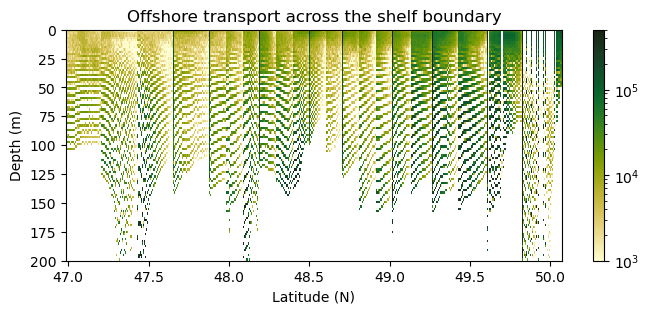

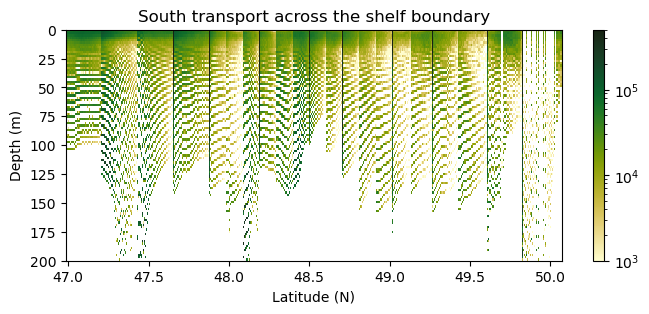

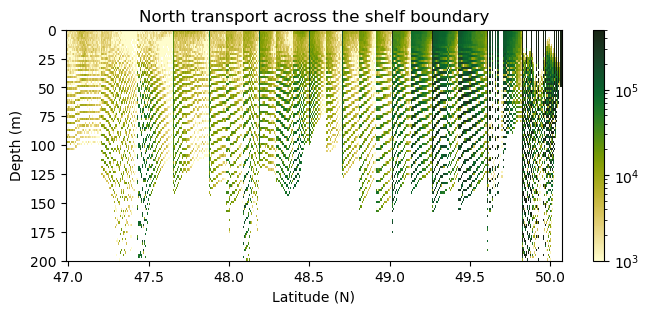

In [7]:
############
# OFFSHORE #
############

# latitude depth at the start boundary
fig, ax = plt.subplots(1,1,figsize=[8,3])

# labelling
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude (N)')
ax.set_title('Offshore transport across the shelf boundary')

# bins by day and lat
bins = [sorted(list(set(off.init_lat))),np.arange(0,201,2)]
# bins = [sorted(list(set(off.init_lat))),sorted(list(set(off.init_depth)))]

#histogram
H, xedges, yedges=np.histogram2d(off.init_lat,off.init_depth,weights=off.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.speed
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=500000))
cb = fig.colorbar(im, ax=ax)
ax.set_ylim([200,0])


#########
# SOUTH #
#########

# latitude depth at the start boundary
fig, ax = plt.subplots(1,1,figsize=[8,3])

# labelling
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude (N)')
ax.set_title('South transport across the shelf boundary')

# bins by day and lat
bins = [sorted(list(set(south.init_lat))),np.arange(0,201,2)]
# bins = [sorted(list(set(south.init_lat))),sorted(list(set(south.init_depth)))]

#histogram
H, xedges, yedges=np.histogram2d(south.init_lat,south.init_depth,weights=south.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.speed
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=500000))
cb = fig.colorbar(im, ax=ax)
ax.set_ylim([200,0])



#########
# NORTH #
#########

# latitude depth at the start boundary
fig, ax = plt.subplots(1,1,figsize=[8,3])

# labelling
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude (N)')
ax.set_title('North transport across the shelf boundary')

# bins by day and lat
bins = [sorted(list(set(north.init_lat))),np.arange(0,201,2)]
# bins = [sorted(list(set(north.init_lat))),sorted(list(set(north.init_depth)))]

#histogram
H, xedges, yedges=np.histogram2d(north.init_lat,north.init_depth,weights=north.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.speed
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=500000))
cb = fig.colorbar(im, ax=ax)
ax.set_ylim([200,0])

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

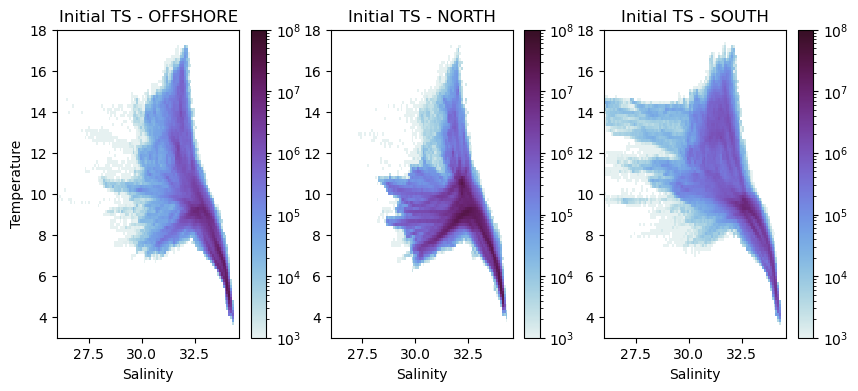

In [8]:
# TS diagrams of the shelf water between the three directions

fig, ax = plt.subplots(1,3,figsize=[10,4])

# labelling
ax[0].set_ylabel('Temperature')
ax[0].set_title('Initial TS - OFFSHORE')
ax[1].set_title('Initial TS - NORTH')
ax[2].set_title('Initial TS - SOUTH')
for axs in ax:
    # axs.set_xlim([0,12360])
    # axs.set_xticks([0,2161,4345,6553,8761,10921,])
    # axs.set_xticklabels(['Jan 1','Apr 1','Jul 1','Oct 1','Jan 1','Apr 1'],fontsize=10)
    axs.set_xlabel('Salinity')

bins =  [np.linspace(26,34.6,100),np.linspace(3,18,100)]

############
# OFFSHORE #
############

H, xedges, yedges=np.histogram2d(off.init_salt,off.init_temp,weights=off.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[0])

#########
# NORTH #
#########

H, xedges, yedges=np.histogram2d(north.init_salt,north.init_temp,weights=north.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[1])

#########
# SOUTH #
#########

H, xedges, yedges=np.histogram2d(south.init_salt,south.init_temp,weights=south.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[2].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[2])

plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

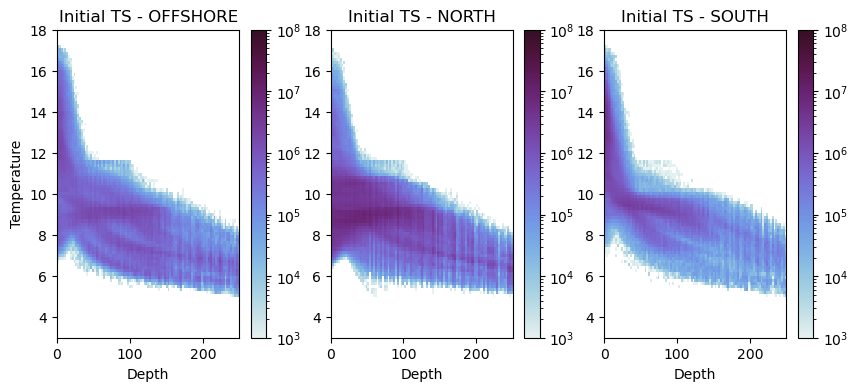

In [9]:
# TS diagrams of the shelf water between the three directions

fig, ax = plt.subplots(1,3,figsize=[10,4])

# labelling
ax[0].set_ylabel('Temperature')
ax[0].set_title('Initial TS - OFFSHORE')
ax[1].set_title('Initial TS - NORTH')
ax[2].set_title('Initial TS - SOUTH')
for axs in ax:
    # axs.set_xlim([0,12360])
    # axs.set_xticks([0,2161,4345,6553,8761,10921,])
    # axs.set_xticklabels(['Jan 1','Apr 1','Jul 1','Oct 1','Jan 1','Apr 1'],fontsize=10)
    axs.set_xlabel('Depth')

bins =  [np.linspace(0,250,100),np.linspace(3,18,100)]

############
# OFFSHORE #
############

H, xedges, yedges=np.histogram2d(off.init_depth,off.init_temp,weights=off.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[0])

#########
# NORTH #
#########

H, xedges, yedges=np.histogram2d(north.init_depth,north.init_temp,weights=north.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[1])

#########
# SOUTH #
#########

H, xedges, yedges=np.histogram2d(south.init_depth,south.init_temp,weights=south.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[2].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[2])

plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

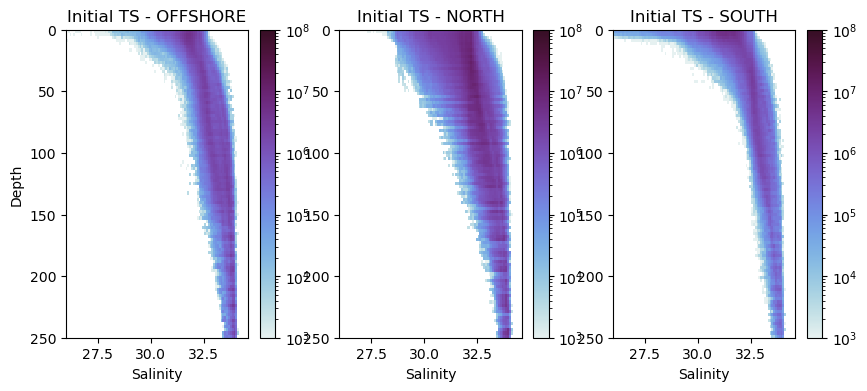

In [10]:
# TS diagrams of the shelf water between the three directions

fig, ax = plt.subplots(1,3,figsize=[10,4])

# labelling
ax[0].set_ylabel('Depth')
ax[0].set_title('Initial TS - OFFSHORE')
ax[1].set_title('Initial TS - NORTH')
ax[2].set_title('Initial TS - SOUTH')
for axs in ax:
    # axs.set_xlim([0,12360])
    # axs.set_xticks([0,2161,4345,6553,8761,10921,])
    # axs.set_xticklabels(['Jan 1','Apr 1','Jul 1','Oct 1','Jan 1','Apr 1'],fontsize=10)
    axs.set_xlabel('Salinity')
    axs.set_ylim(250,0)

bins =  [np.linspace(26,34.6,100),np.linspace(0,250,100)]

############
# OFFSHORE #
############

H, xedges, yedges=np.histogram2d(off.init_salt,off.init_depth,weights=off.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[0].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[0])

#########
# NORTH #
#########

H, xedges, yedges=np.histogram2d(north.init_salt,north.init_depth,weights=north.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[1].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[1])

#########
# SOUTH #
#########

H, xedges, yedges=np.histogram2d(south.init_salt,south.init_depth,weights=south.transport,bins=bins)
H = H.T
H_final = np.where(H>0, H, H*np.nan)
cmap = cm.cm.dense
cmap.set_bad('white')
X, Y = np.meshgrid(xedges, yedges)
im = ax[2].pcolormesh(X, Y, H_final, cmap=cmap, norm=colors.LogNorm(vmin=1000, vmax=100000000))
cb = fig.colorbar(im, ax=ax[2])

plt.tight_layout